In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
%matplotlib inline

In [2]:
import numpy as np

# Генерирует выборку размером 25 на основе экспоненциального распределения
sample = np.random.exponential(scale=1, size=25)

print(sample)

[0.76101129 3.91106797 0.45280998 0.58107668 0.56401576 0.05497742
 0.11968963 1.24620015 0.54531019 1.71312073 0.26216781 0.72198026
 0.430243   1.24254185 0.42997426 0.50843557 0.61421374 0.62651588
 0.8776556  0.75162583 1.01632742 0.4351435  0.1009278  0.30901194
 0.70839591]


In [3]:
from scipy import stats

mode = stats.mode(sample)[0]

# Вычисление медианы
median = np.median(sample)

# Вычисление диапазона 
span = np.max(sample) - np.min(sample)

# Вычисление асимметрии
skewness = stats.skew(sample)

print(f"Mode: {mode}")
print(f"Median: {median}")
print(f"Span: {span}")
print(f"Skewness: {skewness}")

Mode: 0.05497741846879304
Median: 0.5810766795455196
Span: 3.856090548525283
Skewness: 3.029799220782152


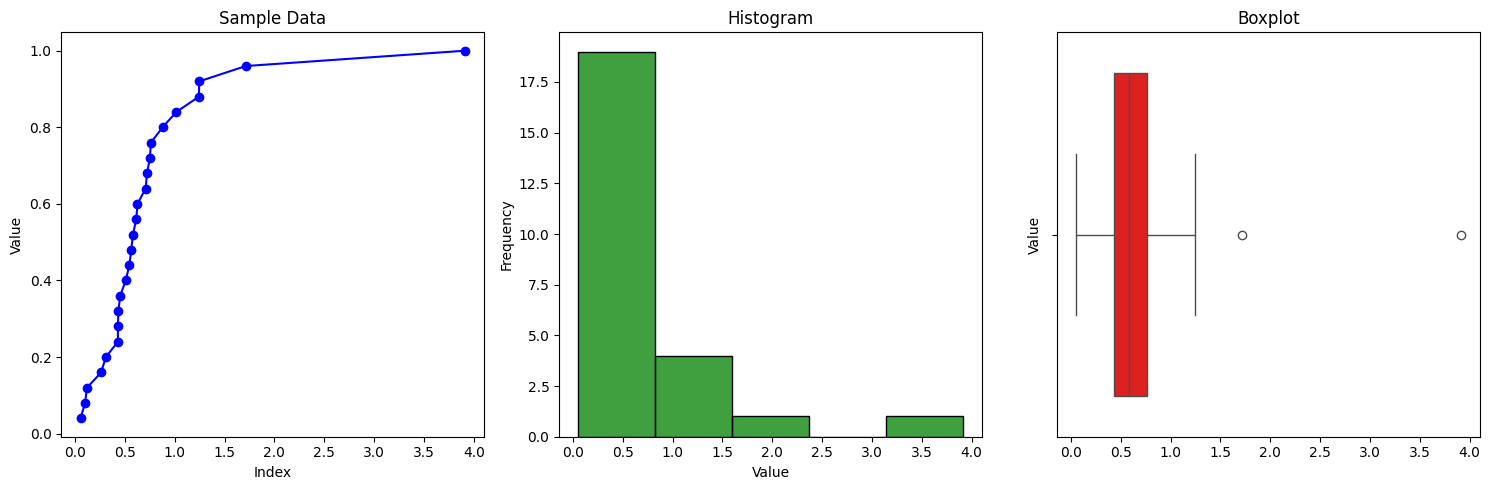

In [4]:
import seaborn as sns
import statsmodels.api as sm

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Построение графиков данных sample
ecdf = sm.distributions.ECDF(sample)
x = np.sort(sample)
y = ecdf(x)
axs[0].plot(x, y, marker='o', linestyle='-', color='b')
axs[0].set_title('Sample Data')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Гистограмма выборки sample
sns.histplot(sample, bins=5, kde=False, color='g', ax=axs[1])
axs[1].set_title('Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Boxplot of the sample
sns.boxplot(x=sample, color='r', ax=axs[2], orient='h')
axs[2].set_title('Boxplot')
axs[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

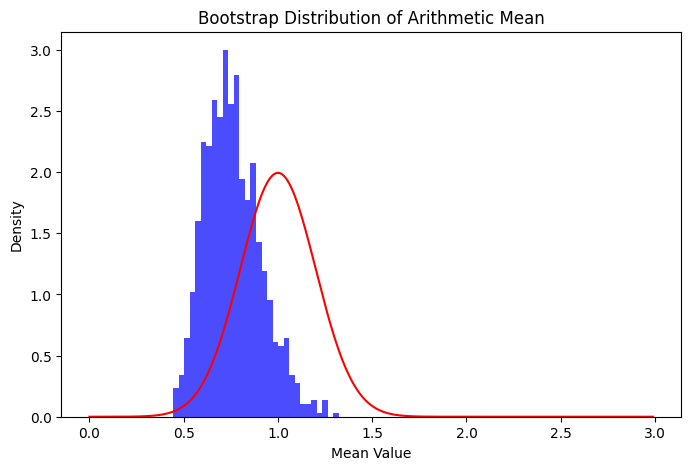

In [5]:
# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and mean estimation
bootstrap_means = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.mean(resample))

# Plotting the distribution of means
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, density=True, color='b', alpha=0.7)
x = np.arange(0, 3, 0.01)
plt.plot(x, norm.pdf(x, 1, 1/5), color = "red")
plt.title('Bootstrap Distribution of Arithmetic Mean')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.show()

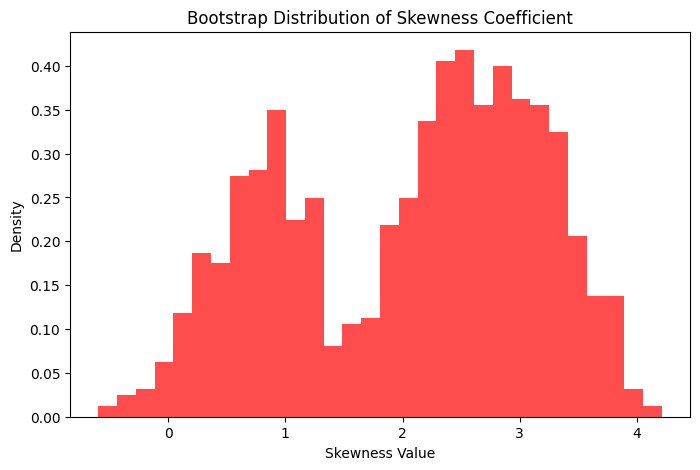

In [6]:
# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and skewness estimation
bootstrap_skewness = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    skewness = stats.skew(resample)
    bootstrap_skewness.append(skewness)

# Plotting the distribution of skewness coefficients
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_skewness, bins=30, density=True, color='r', alpha=0.7)
plt.title('Bootstrap Distribution of Skewness Coefficient')
plt.xlabel('Skewness Value')
plt.ylabel('Density')
plt.show()

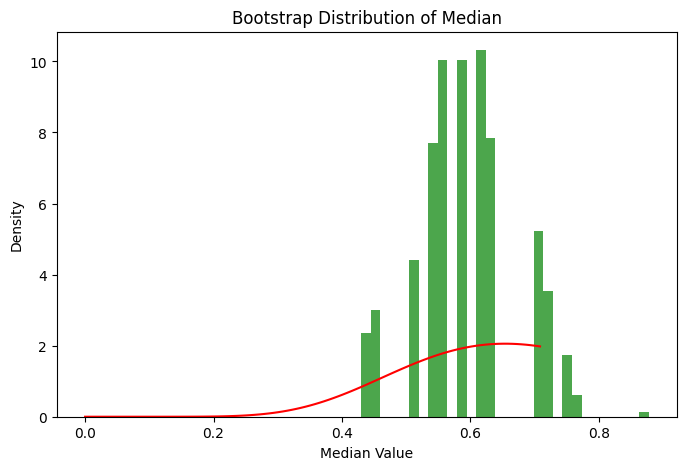

In [7]:
def x13(x):
  return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

# Number of bootstrap resamples
num_resamples = 1000

# Bootstrap resampling and median estimation
bootstrap_medians = []
for _ in range(num_resamples):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    median = np.median(resample)
    bootstrap_medians.append(median)

# Plotting the distribution of medians
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=30, density=True, color='g', alpha=0.7)

x_coord = np.linspace(0, sample[-1], 100)
y_coord = x13(x_coord)
plt.plot(x_coord, y_coord, color = "red")

plt.title('Bootstrap Distribution of Median')
plt.xlabel('Median Value')
plt.ylabel('Density')
plt.show()